In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

## Data Profiling
#### Housing Dataset

In [2]:
df = pd.read_csv('dataset/housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### Data Cleaning

In [5]:
# data is clean

### EDA

In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


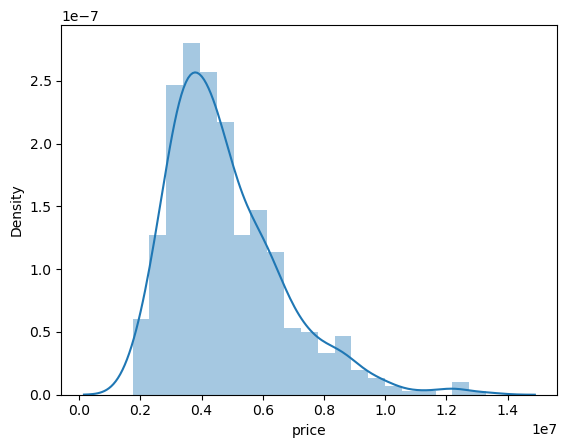

In [7]:
sns.distplot(df['price']);

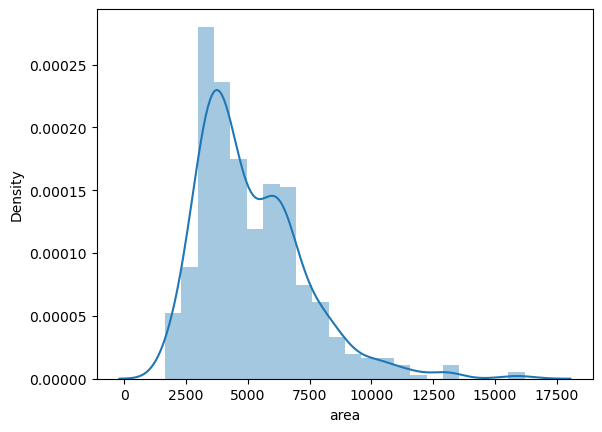

In [8]:
sns.distplot(df['area']);

<AxesSubplot:>

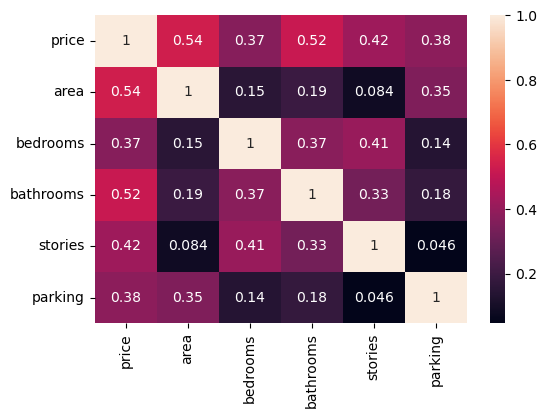

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),annot=True)

### Feature Engineering

One Hot Encoding

In [10]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
# mainroad
df['mainroad'].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [12]:
mainroad_enc = pd.get_dummies(df['mainroad'], prefix = 'mainroad', drop_first = False)
mainroad_enc.head()

,mainroad_no,mainroad_yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [13]:
df = df.drop(['mainroad'], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,no,yes,2,no,furnished


In [14]:
df = pd.concat([df,mainroad_enc], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_no,mainroad_yes
0,13300000,7420,4,2,3,no,no,no,yes,2,yes,furnished,0,1
1,12250000,8960,4,4,4,no,no,no,yes,3,no,furnished,0,1
2,12250000,9960,3,2,2,no,yes,no,no,2,yes,semi-furnished,0,1
3,12215000,7500,4,2,2,no,yes,no,yes,3,yes,furnished,0,1
4,11410000,7420,4,1,2,yes,yes,no,yes,2,no,furnished,0,1


In [15]:
# guestroom
df['guestroom'].value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [16]:
guestroom_enc = pd.get_dummies(df['guestroom'], prefix = 'guestroom', drop_first = False)
guestroom_enc.head()

,guestroom_no,guestroom_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [17]:
df = df.drop(['guestroom'], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_no,mainroad_yes
0,13300000,7420,4,2,3,no,no,yes,2,yes,furnished,0,1
1,12250000,8960,4,4,4,no,no,yes,3,no,furnished,0,1
2,12250000,9960,3,2,2,yes,no,no,2,yes,semi-furnished,0,1
3,12215000,7500,4,2,2,yes,no,yes,3,yes,furnished,0,1
4,11410000,7420,4,1,2,yes,no,yes,2,no,furnished,0,1


In [18]:
df = pd.concat([df,guestroom_enc], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes
0,13300000,7420,4,2,3,no,no,yes,2,yes,furnished,0,1,1,0
1,12250000,8960,4,4,4,no,no,yes,3,no,furnished,0,1,1,0
2,12250000,9960,3,2,2,yes,no,no,2,yes,semi-furnished,0,1,1,0
3,12215000,7500,4,2,2,yes,no,yes,3,yes,furnished,0,1,1,0
4,11410000,7420,4,1,2,yes,no,yes,2,no,furnished,0,1,0,1


In [19]:
# basement
df['basement'].value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [20]:
basement_enc = pd.get_dummies(df['basement'], prefix = 'basement', drop_first = False)
basement_enc.head()

,basement_no,basement_yes
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [21]:
df = df.drop(['basement'], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes
0,13300000,7420,4,2,3,no,yes,2,yes,furnished,0,1,1,0
1,12250000,8960,4,4,4,no,yes,3,no,furnished,0,1,1,0
2,12250000,9960,3,2,2,no,no,2,yes,semi-furnished,0,1,1,0
3,12215000,7500,4,2,2,no,yes,3,yes,furnished,0,1,1,0
4,11410000,7420,4,1,2,no,yes,2,no,furnished,0,1,0,1


In [22]:
df = pd.concat([df,basement_enc], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes
0,13300000,7420,4,2,3,no,yes,2,yes,furnished,0,1,1,0,1,0
1,12250000,8960,4,4,4,no,yes,3,no,furnished,0,1,1,0,1,0
2,12250000,9960,3,2,2,no,no,2,yes,semi-furnished,0,1,1,0,0,1
3,12215000,7500,4,2,2,no,yes,3,yes,furnished,0,1,1,0,0,1
4,11410000,7420,4,1,2,no,yes,2,no,furnished,0,1,0,1,0,1


In [23]:
# hotwaterheating
df['hotwaterheating'].value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

In [24]:
hotwaterheating_enc = pd.get_dummies(df['hotwaterheating'], prefix = 'hotwaterheating', drop_first = False)
hotwaterheating_enc.head()

,hotwaterheating_no,hotwaterheating_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [25]:
df = df.drop(['hotwaterheating'], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,airconditioning,parking,prefarea,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes
0,13300000,7420,4,2,3,yes,2,yes,furnished,0,1,1,0,1,0
1,12250000,8960,4,4,4,yes,3,no,furnished,0,1,1,0,1,0
2,12250000,9960,3,2,2,no,2,yes,semi-furnished,0,1,1,0,0,1
3,12215000,7500,4,2,2,yes,3,yes,furnished,0,1,1,0,0,1
4,11410000,7420,4,1,2,yes,2,no,furnished,0,1,0,1,0,1


In [26]:
df = pd.concat([df,hotwaterheating_enc], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,airconditioning,parking,prefarea,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes
0,13300000,7420,4,2,3,yes,2,yes,furnished,0,1,1,0,1,0,1,0
1,12250000,8960,4,4,4,yes,3,no,furnished,0,1,1,0,1,0,1,0
2,12250000,9960,3,2,2,no,2,yes,semi-furnished,0,1,1,0,0,1,1,0
3,12215000,7500,4,2,2,yes,3,yes,furnished,0,1,1,0,0,1,1,0
4,11410000,7420,4,1,2,yes,2,no,furnished,0,1,0,1,0,1,1,0


In [27]:
# airconditioning
df['airconditioning'].value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

In [28]:
airconditioning_enc = pd.get_dummies(df['airconditioning'], prefix = 'airconditioning', drop_first = False)
airconditioning_enc.head()

,airconditioning_no,airconditioning_yes
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [29]:
df = df.drop(['airconditioning'], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,parking,prefarea,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes
0,13300000,7420,4,2,3,2,yes,furnished,0,1,1,0,1,0,1,0
1,12250000,8960,4,4,4,3,no,furnished,0,1,1,0,1,0,1,0
2,12250000,9960,3,2,2,2,yes,semi-furnished,0,1,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,yes,furnished,0,1,1,0,0,1,1,0
4,11410000,7420,4,1,2,2,no,furnished,0,1,0,1,0,1,1,0


In [30]:
df = pd.concat([df,airconditioning_enc], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,parking,prefarea,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes
0,13300000,7420,4,2,3,2,yes,furnished,0,1,1,0,1,0,1,0,0,1
1,12250000,8960,4,4,4,3,no,furnished,0,1,1,0,1,0,1,0,0,1
2,12250000,9960,3,2,2,2,yes,semi-furnished,0,1,1,0,0,1,1,0,1,0
3,12215000,7500,4,2,2,3,yes,furnished,0,1,1,0,0,1,1,0,0,1
4,11410000,7420,4,1,2,2,no,furnished,0,1,0,1,0,1,1,0,0,1


In [31]:
# prefarea
df['prefarea'].value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

In [32]:
prefarea_enc = pd.get_dummies(df['prefarea'], prefix = 'prefarea', drop_first = False)
prefarea_enc.head()

,prefarea_no,prefarea_yes
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [33]:
df = df.drop(['prefarea'], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes
0,13300000,7420,4,2,3,2,furnished,0,1,1,0,1,0,1,0,0,1
1,12250000,8960,4,4,4,3,furnished,0,1,1,0,1,0,1,0,0,1
2,12250000,9960,3,2,2,2,semi-furnished,0,1,1,0,0,1,1,0,1,0
3,12215000,7500,4,2,2,3,furnished,0,1,1,0,0,1,1,0,0,1
4,11410000,7420,4,1,2,2,furnished,0,1,0,1,0,1,1,0,0,1


In [34]:
df = pd.concat([df,prefarea_enc], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,7420,4,2,3,2,furnished,0,1,1,0,1,0,1,0,0,1,0,1
1,12250000,8960,4,4,4,3,furnished,0,1,1,0,1,0,1,0,0,1,1,0
2,12250000,9960,3,2,2,2,semi-furnished,0,1,1,0,0,1,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,furnished,0,1,1,0,0,1,1,0,0,1,0,1
4,11410000,7420,4,1,2,2,furnished,0,1,0,1,0,1,1,0,0,1,1,0


In [35]:
# furnishingstatus
df['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [36]:
furnishingstatus_enc = pd.get_dummies(df['furnishingstatus'], prefix = 'furnishingstatus', drop_first = False)
furnishingstatus_enc.head()

,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [37]:
df = df.drop(['furnishingstatus'], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,0,1
1,12250000,8960,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0
2,12250000,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,0,1
4,11410000,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0


In [38]:
df = pd.concat([df,furnishingstatus_enc], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0


MinMax Scaler

In [39]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0


In [40]:
scaler = MinMaxScaler()

In [41]:
# area
df[['area']] = scaler.fit_transform(df[['area']])

### Predicting with all features
### Preprocessing Data

- Feature Importance

In [42]:
X = df.drop('price',axis=1)
y = df['price']

In [43]:
X

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.396564,4,2,3,2,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0
1,0.502405,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0
2,0.571134,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0
3,0.402062,4,2,2,3,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0
4,0.396564,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.092784,2,1,1,2,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1
541,0.051546,3,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
542,0.135395,2,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1
543,0.086598,3,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0


In [44]:
# define the model
model = LinearRegression()

In [45]:
# fit the model
model.fit(X,y)

LinearRegression()

In [46]:
# get importance
importance = model.coef_

In [47]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %d, Score: %.5f'%(i,v))

Feature: 0, Score: 3634268.42270
Feature: 1, Score: 132946.57331
Feature: 2, Score: 959988.47210
Feature: 3, Score: 479370.44654
Feature: 4, Score: 292756.23538
Feature: 5, Score: 7217152547630977024.00000
Feature: 6, Score: 7217152547631368192.00000
Feature: 7, Score: 16665276900315807744.00000
Feature: 8, Score: 16665276900316119040.00000
Feature: 9, Score: 175029283179407900672.00000
Feature: 10, Score: 175029283179408293888.00000
Feature: 11, Score: 396871398184296640.00000
Feature: 12, Score: 396871398185168192.00000
Feature: 13, Score: -744836730685358336.00000
Feature: 14, Score: -744836730684546944.00000
Feature: 15, Score: 1196521762226989824.00000
Feature: 16, Score: 1196521762227637504.00000
Feature: 17, Score: -57436906098743721984.00000
Feature: 18, Score: -57436906098743762944.00000
Feature: 19, Score: -57436906098744074240.00000


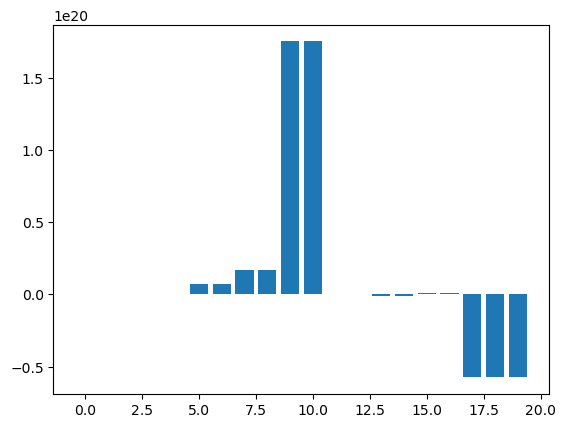

In [48]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

- Splitting Training and Test Data

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

## Machine_Learning_Regression_Multiple_Linear_Regression with All Features

- Fitting into Training

In [50]:
regressor = LinearRegression()

In [51]:
regressor.fit(X_train, y_train)

LinearRegression()

- Predict The Result

In [52]:
y_predict = regressor.predict(X_test)

- Plot The Result

In [53]:
result = pd.DataFrame({'Actual':y_test,'Predict':y_predict})

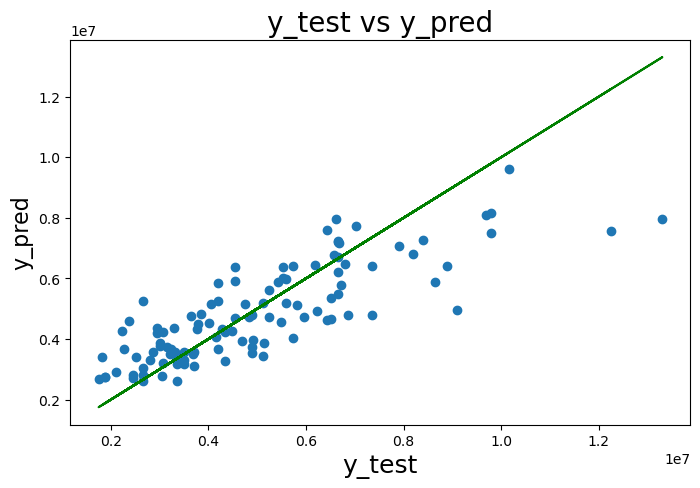

In [54]:
fig = plt.figure(figsize=(8,5))
plt.scatter(y_test, y_predict)
plt.title('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)      
plt.plot(y_test, y_test, color="g")

### Evaluate Model

In [55]:
mean_absolute_percentage_error(y_test,y_predict)

0.21035523310799578

### Predicting with selected features
### Preprocessing Data
- Feature Selection

In [56]:
X.drop('furnishingstatus_unfurnished',axis=1,inplace=True)
X.drop('mainroad_no',axis=1,inplace=True)
X.drop('guestroom_no',axis=1,inplace=True)
X.drop('basement_no',axis=1,inplace=True)
X.drop('hotwaterheating_no',axis=1,inplace=True)
X.drop('airconditioning_no',axis=1,inplace=True)
X.drop('prefarea_no',axis=1,inplace=True)

- Feature Importance

In [57]:
X.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished
0,0.396564,4,2,3,2,1,0,0,0,1,1,1,0
1,0.502405,4,4,4,3,1,0,0,0,1,0,1,0
2,0.571134,3,2,2,2,1,0,1,0,0,1,0,1
3,0.402062,4,2,2,3,1,0,1,0,1,1,1,0
4,0.396564,4,1,2,2,1,1,1,0,1,0,1,0


In [58]:
# define the model
model = LinearRegression()

In [59]:
# fit the model
model.fit(X,y)

LinearRegression()

In [60]:
# get importance
importance = model.coef_

In [61]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %d, Score: %.5f'%(i,v))

Feature: 0, Score: 3552228.07025
Feature: 1, Score: 114787.56018
Feature: 2, Score: 987668.10729
Feature: 3, Score: 450848.00286
Feature: 4, Score: 277107.10134
Feature: 5, Score: 421272.58873
Feature: 6, Score: 300525.85964
Feature: 7, Score: 350106.90414
Feature: 8, Score: 855447.14540
Feature: 9, Score: 864958.31132
Feature: 10, Score: 651543.79986
Feature: 11, Score: 411234.38616
Feature: 12, Score: 364889.76618


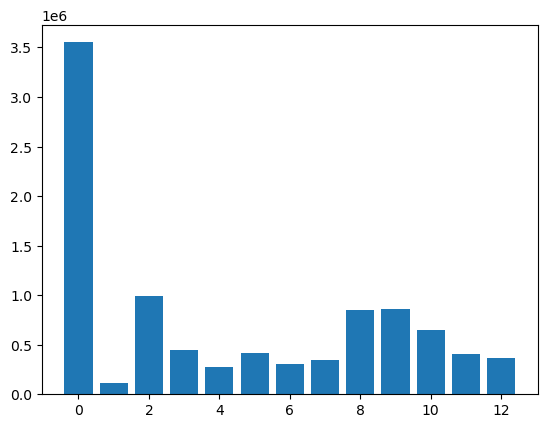

In [62]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

- Splitting Training and Test Data

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

## Machine_Learning_Regression_Multiple_Linear_Regression with Selected Features

- Fitting into Training

In [64]:
regressor = LinearRegression()

In [65]:
regressor.fit(X_train, y_train)

LinearRegression()

- Predict The Result

In [66]:
y_predict = regressor.predict(X_test)

- Plot The Result

In [67]:
result = pd.DataFrame({'Actual':y_test,'Predict':y_predict})

In [68]:
result

,Actual,Predict
316,4060000,5.164654e+06
77,6650000,7.224722e+06
360,3710000,3.109863e+06
90,6440000,4.612075e+06
493,2800000,3.294646e+06
...,...,...
15,9100000,4.973331e+06
357,3773000,4.336651e+06
39,7910000,7.059063e+06
54,7350000,6.398941e+06


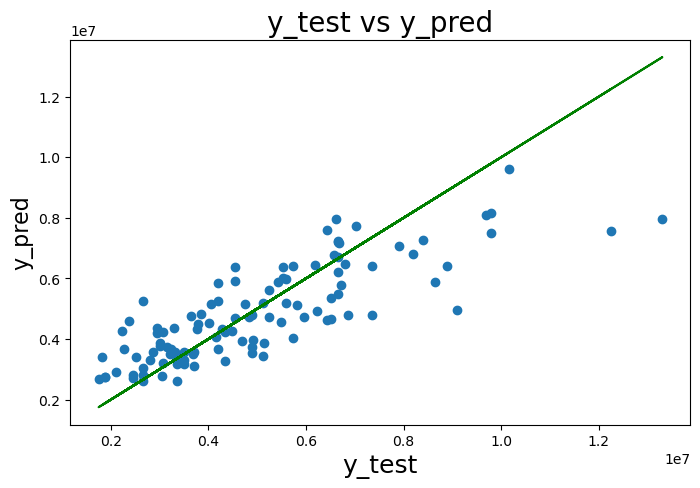

In [69]:
fig = plt.figure(figsize=(8,5))
plt.scatter(y_test, y_predict)
plt.title('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)      
plt.plot(y_test, y_test, color="g")

### Evaluate Model

In [70]:
mean_absolute_percentage_error(y_test,y_predict)

0.21035523310799586